In [1]:
#working hour 10 hr
# import libraries
import osmnx as ox
import networkx as nx
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt
# import osmium as osm
# import pandas as pd

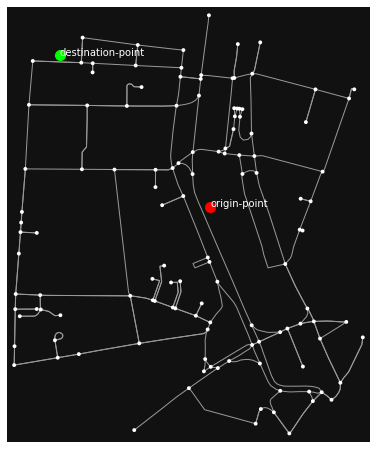

In [2]:
footways = ox.graph_from_bbox(48.1391,48.1319, 11.5698,11.5604, network_type='drive_service')

# define origin and desination locations
# sample point based on target and source 
origin_point = ( 48.135710, 11.565572) 
destination_point = (48.138244, 11.561798)

# plot graph and origin - destination
fig, ax = ox.plot_graph(footways, show=False)
ax.scatter(origin_point[1], origin_point[0], c='red', s=100, label='orig', marker='o')
ax.scatter(destination_point[1], destination_point[0], c='lime', s=100, label='dest', marker='o')
ax.annotate('origin-point', (origin_point[1], origin_point[0]), color = 'white')
ax.annotate('destination-point', (destination_point[1], destination_point[0]),color = 'white')
plt.show()

In [3]:
# get the nearest nodes to the locations 
origin_node = ox.get_nearest_node(footways, origin_point) 
destination_node = ox.get_nearest_node(footways, destination_point)
print(origin_node)
print(destination_node)

2844820348
21563705


c:\Users\ZENI\AppData\Local\Programs\Python\Python38\lib\site-packages\osmnx\distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
c:\Users\ZENI\AppData\Local\Programs\Python\Python38\lib\site-packages\osmnx\distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)


In [4]:
# visualization
# check the ori and desti nodes
long = [footways.nodes[origin_node]['x'],footways.nodes[destination_node]['x']] 
lat = [footways.nodes[origin_node]['y'],footways.nodes[destination_node]['y']]  

def plot_path(lat, long, origin_point, destination_point):

    # adding the lines joining the nodes
    fig = go.Figure(go.Scattermapbox(
        name = "Path",
        mode = "lines",
        lon = long,
        lat = lat,
        marker = {'size': 10},
        line = dict(width = 4.5, color = 'blue')))
    # adding source marker
    fig.add_trace(go.Scattermapbox(
        name = "Source",
        mode = "markers",
        lon = [origin_point[1]],
        lat = [origin_point[0]],
        marker = {'size': 12, 'color':"red"}))
     
    # adding destination marker
    fig.add_trace(go.Scattermapbox(
        name = "Destination",
        mode = "markers",
        lon = [destination_point[1]],
        lat = [destination_point[0]],
        marker = {'size': 12, 'color':'green'}))
    
    # getting center for plots:
    lat_center = np.mean(lat)
    long_center = np.mean(long)
    # defining the layout using mapbox_style
    fig.update_layout(mapbox_style="stamen-terrain",
        mapbox_center_lat = 30, mapbox_center_lon=-80)
    fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0},
                      mapbox = {
                          'center': {'lat': lat_center, 
                          'lon': long_center},
                          'zoom': 13})
    fig.show()

plot_path(lat, long, origin_point, destination_point)

In [5]:
# Python3 implementation for
# D'Esopo-Pape algorithm

from collections import defaultdict, deque

def printPath(parent, j):
		
		#Base Case : If j is source
		if parent[j] == -1 :
			print(j,end=" ")
			return
		printPath(parent , parent[j])
		print (j,end=" ")

def printSolution(dist, parent):
	src = 0
	print("Vertex \t\tDistance from Source\tPath")
	for i in range(1, len(dist)):
		if dist[i] == float('inf'):
			pass
		else:
			print("\n%d --> %d \t\t%d \t\t\t\t\t" % (src, i, dist[i]),end=" ")
			printPath(parent,i)

def desopo(graph, source_index):
	# Number of vertices in graph
	v = len(graph)
	
	# Adjacency list of graph
	adj = defaultdict(list)
	for i in range(v):
		for j in range(i + 1, v):
			if graph[i][j] != 0:
				adj[i].append(
					[graph[i][j], j]
				)
				adj[j].append(
					[graph[i][j], i]
				)
	# print(adj)
	
	# return print(adj[80])
	# Queue to store unoperated vertices
	q = deque([])
	
	# Distance from source vertex
	distance =[float('inf')]*v
	
	# Status of vertex
	is_in_queue =[False]*v
	
	# let 0 be the source vertex
	source = source_index
	distance[source]= 0
	
	#q_initialize
	q.append(source)
	
	is_in_queue[source]= True
	parent = [-1] * v
	
	while q:
		
		# Pop from front of the queue ~ Q - removal
		u = q.popleft()

		is_in_queue[u]= False
	
		# scan adjacent vertices of u
		for e in adj[u]:
			# e <- [weight, vertex]
			if distance[e[1]] > distance[u]+e[0]:
				distance[e[1]]= distance[u]+e[0]

				#record path
				parent [e[1]] = u

				if is_in_queue[e[1]]== False:
					# if e[1] is entering
					# first time in the queue
					if distance[e[1]]== float('inf'):
						# Append at back of queue
						q.append(e[1])
					else:
						# Append at front of queue
						q.appendleft(e[1])
					is_in_queue[e[1]] = True
	
	printSolution(distance, parent)
	return distance

In [6]:
#check index nodes
print(list(footways.nodes())[5]) #second path yang harusnya ada tetangganya
print(list(footways.nodes())[80] == origin_node)
print(origin_node)

361794
True
2844820348


In [7]:
print(list(footways.neighbors(origin_node)))
print(list(footways.neighbors(361794)))

[3079788204, 2844820350]
[2844820348, 2489934072]


In [8]:
print(list(footways.nodes()).index(3079788204))
print(list(footways.nodes()).index(2844820350))

85
81


In [9]:
for edge in list(footways.edges()):
    if edge[0] == 361794 or edge[1] == 361794 or edge[0] == origin_node or edge[1] == origin_node:
        print(edge)

(361794, 2844820348)
(361794, 2489934072)
(361799, 361794)
(1577200065, 361794)
(2489934072, 361794)
(2844820348, 3079788204)
(2844820348, 2844820350)
(2844820350, 2844820348)


In [10]:
cek_route = [origin_node, 3079788204, 2844820350, 361794, 2489934072]
long = [] 
lat = []  
for i in cek_route:
     point = footways.nodes[i]
     long.append(point['x'])
     lat.append(point['y'])

plot_path(lat, long, origin_point, destination_point)

In [11]:
print(list(footways.nodes()).index(destination_node))

36


In [22]:
nx.to_numpy_array(footways, weight='weight')[80]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.])

In [12]:
desopo(list(nx.to_numpy_array(footways, weight='weight')),80)

Vertex 		Distance from Source	Path

0 --> 1 		11 					 80 5 76 67 27 74 2 95 90 94 96 1 
0 --> 2 		6 					 80 5 76 67 27 74 2 
0 --> 4 		23 					 80 5 76 67 27 24 25 114 115 65 9 38 62 12 116 45 21 17 7 39 60 51 34 4 
0 --> 5 		1 					 80 5 
0 --> 7 		18 					 80 5 76 67 27 24 25 114 115 65 9 38 62 12 116 45 21 17 7 
0 --> 8 		15 					 80 5 76 67 27 74 2 95 90 94 96 1 0 55 98 8 
0 --> 9 		10 					 80 5 76 67 27 24 25 114 115 65 9 
0 --> 10 		24 					 80 5 76 67 27 74 2 95 90 94 96 1 0 55 98 8 14 57 56 40 41 43 42 36 10 
0 --> 12 		13 					 80 5 76 67 27 24 25 114 115 65 9 38 62 12 
0 --> 13 		16 					 80 5 76 67 27 24 25 114 115 65 9 38 62 12 116 88 13 
0 --> 14 		16 					 80 5 76 67 27 74 2 95 90 94 96 1 0 55 98 8 14 
0 --> 17 		17 					 80 5 76 67 27 24 25 114 115 65 9 38 62 12 116 45 21 17 
0 --> 18 		20 					 80 5 76 67 27 24 25 114 115 65 9 38 62 12 116 45 21 17 7 39 18 
0 --> 21 		16 					 80 5 76 67 27 24 25 114 115 65 9 38 62 12 116 45 21 
0 --> 22 		6 					 80 5 76 67 27 24 22

[12.0,
 11.0,
 6.0,
 inf,
 23.0,
 1.0,
 inf,
 18.0,
 15.0,
 10.0,
 24.0,
 inf,
 13.0,
 16.0,
 16.0,
 inf,
 inf,
 17.0,
 20.0,
 inf,
 inf,
 16.0,
 6.0,
 11.0,
 5.0,
 6.0,
 10.0,
 4.0,
 8.0,
 13.0,
 14.0,
 12.0,
 16.0,
 18.0,
 22.0,
 inf,
 23.0,
 inf,
 11.0,
 19.0,
 19.0,
 20.0,
 22.0,
 21.0,
 22.0,
 15.0,
 inf,
 inf,
 inf,
 23.0,
 22.0,
 21.0,
 14.0,
 inf,
 14.0,
 13.0,
 18.0,
 17.0,
 17.0,
 15.0,
 20.0,
 12.0,
 12.0,
 12.0,
 11.0,
 9.0,
 inf,
 3.0,
 13.0,
 17.0,
 12.0,
 16.0,
 6.0,
 7.0,
 5.0,
 3.0,
 2.0,
 inf,
 inf,
 inf,
 0,
 1.0,
 23.0,
 24.0,
 inf,
 1.0,
 17.0,
 17.0,
 15.0,
 9.0,
 8.0,
 21.0,
 22.0,
 18.0,
 9.0,
 7.0,
 10.0,
 8.0,
 14.0,
 15.0,
 8.0,
 7.0,
 7.0,
 7.0,
 8.0,
 7.0,
 8.0,
 10.0,
 9.0,
 8.0,
 7.0,
 6.0,
 6.0,
 5.0,
 7.0,
 8.0,
 14.0,
 inf,
 inf,
 inf,
 inf,
 9.0,
 10.0,
 inf]

In [13]:
steps = [80, 5, 76, 67, 27, 74, 2, 95, 90, 94, 96, 1, 0, 55, 98, 8, 14, 57, 56, 40, 41, 43, 42, 36]
# steps = [36, 42, 43, 41, 40, 56, 57, 14, 8, 98, 55, 0, 1, 96, 94, 90, 95, 2, 74, 27, 67, 76, 5, 80] 36 -> 80
# steps = [80, 5, 8, 56, 40, 41, 36]
cek_route_aneh = []
for i in steps:
    cek_route_aneh.append(list(footways.nodes())[i])
long = [] 
lat = []  
for i in cek_route_aneh:
     point = footways.nodes[i]
     long.append(point['x'])
     lat.append(point['y'])

plot_path(lat, long, origin_point, destination_point)

In [14]:
print(cek_route_aneh)
total_length = 0
for index, data in enumerate(cek_route_aneh[:-1]):
    if footways.get_edge_data(cek_route_aneh[index],cek_route_aneh[index+1])!=None:
        total_length += footways.get_edge_data(cek_route_aneh[index],cek_route_aneh[index+1])[0]['length']
    elif footways.get_edge_data(cek_route_aneh[index+1],cek_route_aneh[index]):
        total_length += footways.get_edge_data(cek_route_aneh[index+1],cek_route_aneh[index])[0]['length']
    else:
        print('data tidak ada', data)
total_length

[2844820348, 361794, 2489934072, 1600345411, 19099331, 2471583309, 277387, 4235849717, 3660514168, 4235849707, 4235849718, 277386, 277385, 534470056, 4446662265, 361799, 18291200, 658947407, 658947405, 283538629, 310751726, 331139687, 331139686, 21563705]


1652.4229999999998

In [15]:
# steps = [80, 5, 76, 67, 27, 74, 2, 95, 90, 94, 96, 1, 0, 55, 98, 8, 14, 57, 56, 40, 41, 43, 42, 36]
# steps = [36, 42, 43, 41, 40, 56, 57, 14, 8, 98, 55, 0, 1, 96, 94, 90, 95, 2, 74, 27, 67, 76, 5, 80] 36 -> 80
steps = [80, 5, 8, 56, 40, 41, 36]
cek_route = []
for i in steps:
    cek_route.append(list(footways.nodes())[i])
long = [] 
lat = []  
for i in cek_route:
     point = footways.nodes[i]
     long.append(point['x'])
     lat.append(point['y'])

plot_path(lat, long, origin_point, destination_point)

In [16]:
print(cek_route)
total_length = 0
for index, data in enumerate(cek_route[:-1]):
    if footways.get_edge_data(cek_route[index],cek_route[index+1])!=None:
        total_length += footways.get_edge_data(cek_route[index],cek_route[index+1])[0]['length']
    elif footways.get_edge_data(cek_route[index+1],cek_route[index]):
        total_length += footways.get_edge_data(cek_route[index+1],cek_route[index])[0]['length']
    else:
        print('data tidak ada', data)
total_length

[2844820348, 361794, 361799, 658947405, 283538629, 310751726, 21563705]
data tidak ada 310751726


329.767

In [17]:
for edge in list(footways.edges()):
    if edge[0] == 361794 or edge[1] == 361794 or edge[0] == 361799 or edge[1] == 361799:
        print(edge)

(361794, 2844820348)
(361794, 2489934072)
(361799, 4446662265)
(361799, 18291200)
(361799, 361794)
(658947405, 361799)
(1577200065, 361794)
(2489934072, 361794)
(4446662265, 361799)


In [18]:
#nodes yang harus dicheck adj matrix 80 sama 5, kenapa dari 5 gamau ke 8, malah 5 ke 76 dst
# steps = [80, 5, 76, 67, 27, 74, 2, 95, 90, 94, 96, 1, 0, 55, 98, 8, 14, 57, 56, 40, 41, 43, 42, 36]
# steps = [80, 5, 8, 56, 40, 41, 36]
check_node = [80,5,8,76,56,14,57,40,41,43,42,36]
for i in check_node:
    for j in check_node:
        print("matrix",i,"content ke",j,":",list(nx.to_numpy_array(footways, weight='weight'))[i][j])        

matrix 80 content ke 80 : 0.0
matrix 80 content ke 5 : 0.0
matrix 80 content ke 8 : 0.0
matrix 80 content ke 76 : 0.0
matrix 80 content ke 56 : 0.0
matrix 80 content ke 14 : 0.0
matrix 80 content ke 57 : 0.0
matrix 80 content ke 40 : 0.0
matrix 80 content ke 41 : 0.0
matrix 80 content ke 43 : 0.0
matrix 80 content ke 42 : 0.0
matrix 80 content ke 36 : 0.0
matrix 5 content ke 80 : 1.0
matrix 5 content ke 5 : 0.0
matrix 5 content ke 8 : 0.0
matrix 5 content ke 76 : 1.0
matrix 5 content ke 56 : 0.0
matrix 5 content ke 14 : 0.0
matrix 5 content ke 57 : 0.0
matrix 5 content ke 40 : 0.0
matrix 5 content ke 41 : 0.0
matrix 5 content ke 43 : 0.0
matrix 5 content ke 42 : 0.0
matrix 5 content ke 36 : 0.0
matrix 8 content ke 80 : 0.0
matrix 8 content ke 5 : 1.0
matrix 8 content ke 8 : 0.0
matrix 8 content ke 76 : 0.0
matrix 8 content ke 56 : 0.0
matrix 8 content ke 14 : 1.0
matrix 8 content ke 57 : 0.0
matrix 8 content ke 40 : 0.0
matrix 8 content ke 41 : 0.0
matrix 8 content ke 43 : 0.0
matrix 8

In [19]:
adj_matrix = list(nx.to_numpy_array(footways, weight='length'))
adj_matrix[5][8]=1
adj_matrix[8][56]=1
adj_matrix[56][40]=1
adj_matrix[41][36]=1
adj_matrix[36][41]=1
desopo(adj_matrix,80)

Vertex 		Distance from Source	Path

0 --> 1 		451 					 80 5 8 98 55 0 1 
0 --> 2 		615 					 80 5 76 67 27 74 2 
0 --> 4 		1496 					 80 5 76 67 27 24 25 114 115 65 9 38 62 12 116 45 21 17 7 39 60 51 34 4 
0 --> 5 		55 					 80 5 
0 --> 7 		1241 					 80 5 76 67 27 24 25 114 115 65 9 38 62 12 116 45 21 17 7 
0 --> 8 		56 					 80 5 8 
0 --> 9 		807 					 80 5 76 67 27 24 25 114 115 65 9 
0 --> 10 		251 					 80 5 8 56 40 41 36 10 
0 --> 12 		880 					 80 5 76 67 27 24 25 114 115 65 9 38 62 12 
0 --> 13 		991 					 80 5 76 67 27 24 25 114 115 65 9 38 62 12 116 88 13 
0 --> 14 		105 					 80 5 8 14 
0 --> 17 		1209 					 80 5 76 67 27 24 25 114 115 65 9 38 62 12 116 45 21 17 
0 --> 18 		1304 					 80 5 76 67 27 24 25 114 115 65 9 38 62 12 116 45 21 17 7 39 18 
0 --> 21 		1031 					 80 5 76 67 27 24 25 114 115 65 9 38 62 12 116 45 21 
0 --> 22 		606 					 80 5 76 67 27 24 22 
0 --> 23 		798 					 80 5 76 67 27 24 25 114 115 65 122 23 
0 --> 24 		492 					 80 5 76 67 27 24 
0 --> 25 		624

[331.789,
 451.356,
 615.7479999999999,
 inf,
 1496.612,
 55.861000000000004,
 inf,
 1241.324,
 56.861000000000004,
 807.6089999999999,
 251.401,
 inf,
 880.1129999999999,
 991.896,
 105.028,
 inf,
 inf,
 1209.738,
 1304.949,
 inf,
 inf,
 1031.67,
 606.859,
 798.146,
 492.47,
 624.871,
 560.033,
 402.283,
 729.033,
 960.7529999999999,
 1009.5519999999999,
 946.396,
 965.3029999999999,
 1151.4569999999999,
 1437.873,
 inf,
 161.002,
 inf,
 821.8739999999999,
 1269.394,
 74.666,
 160.002,
 207.71300000000002,
 198.36700000000002,
 283.866,
 938.999,
 inf,
 inf,
 inf,
 1371.786,
 1347.91,
 1306.344,
 956.708,
 inf,
 345.236,
 223.29399999999998,
 57.861000000000004,
 95.91900000000001,
 1102.1080000000002,
 1084.1039999999998,
 1296.829,
 855.4769999999999,
 865.0219999999999,
 904.5799999999999,
 845.0529999999999,
 719.049,
 inf,
 164.882,
 975.722,
 1131.4249999999997,
 911.4259999999999,
 1107.4879999999998,
 596.985,
 641.952,
 570.093,
 120.72800000000001,
 88.35900000000001,
 inf,


In [20]:
steps = [80, 5, 8, 56, 40, 41, 36]
cek_route = []
for i in steps:
    cek_route.append(list(footways.nodes())[i])
long = [] 
lat = []  
for i in cek_route:
     point = footways.nodes[i]
     long.append(point['x'])
     lat.append(point['y'])

plot_path(lat, long, origin_point, destination_point)